# Linear Regression

Let's fabricate some data that shows a roughly linear relationship between page speed and amount purchased:

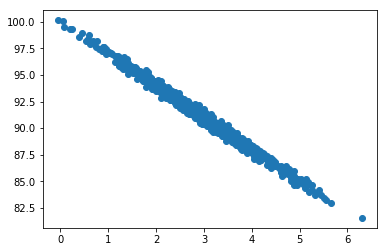

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [22]:
area = pd.Series([2600,3000, 3200, 3600, 4000])
price = pd.Series([550000, 565000,610000, 680000,725000])
df = pd.DataFrame(dict(area = area, price = price), index=area.index)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


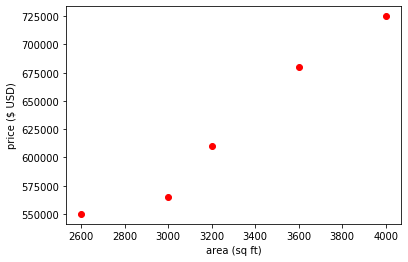

In [24]:
plt.xlabel('area (sq ft)')
plt.ylabel('price ($ USD)')
plt.scatter(df.area, df.price, )

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
reg.predict(np.array([3300]).reshape(1,1))

array([628715.75342466])

In [53]:
reg.coef_

array([135.78767123])

In [54]:
reg.intercept_

180616.43835616432

In [55]:
# y = m * x + b
# in this case
# price is y
# m is slop, which is coeficent
# X is the independent value
# b intercept

price = 135.78767123 * 3300 + 180616.43835616432
price

628715.7534151643

As we only have two features, we can keep it simple and just use scipy.state.linregress:

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


Not surprisngly, our R-squared value shows a really good fit:

In [3]:
r_value ** 2

0.990903801365279

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

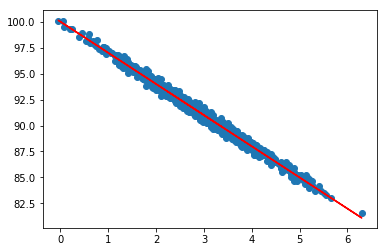

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

## Activity

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value.